# Кластеризация набора данных Soybean
## Загрузка выборки
Для начала загрузим исходную выборку. Она состоит из 19 классов, у каждого объекта выборки есть 35 категориальных атрибутов. Атрибуты задаются целыми или вещественными числами, однако встречаются и неизвестные значения, которые обозначаются "?". В данном варианте все неизвестные значения были заменены на среднее значение атрибута по всем объектам выборки.

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('soybean_large_data', delimiter=',',
                   names=['classes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                          '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                          '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                          '31', '32', '33', '34', '35'])
df2 = pd.read_csv('soybean_large_test', delimiter=',',
                   names=['classes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                          '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                          '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                          '31', '32', '33', '34', '35'])

In [239]:
df1.head()

,classes,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
df2.head()

,classes,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,5.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
x = pd.concat([df1, df2])
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 375
Data columns (total 36 columns):
classes    683 non-null object
1          683 non-null float64
2          683 non-null float64
3          683 non-null float64
4          683 non-null float64
5          683 non-null float64
6          683 non-null float64
7          683 non-null float64
8          683 non-null float64
9          683 non-null float64
10         683 non-null float64
11         683 non-null float64
12         683 non-null float64
13         683 non-null float64
14         683 non-null float64
15         683 non-null float64
16         683 non-null float64
17         683 non-null float64
18         683 non-null float64
19         683 non-null float64
20         683 non-null float64
21         683 non-null float64
22         683 non-null float64
23         683 non-null float64
24         683 non-null float64
25         683 non-null float64
26         683 non-null float64
27         683 non-null float64


## Нормализация данных
С помощью MinMaxScaler изменим масштаб входных данных в диапазоне от 0 до 1.

In [242]:
scaler = MinMaxScaler()
y = x['classes']
x.drop('classes', axis=1, inplace=True)
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,0.000000,1.00000,0.500000,0.000000,0.333333,0.333333,0.500000,0.000000,0.00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.000000,1.00000,0.500000,0.000000,0.666667,0.000000,1.000000,0.500000,0.50,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.500000,0.000000,1.00000,0.500000,0.000000,0.333333,0.000000,1.000000,0.500000,1.00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.500000,0.000000,1.00000,0.500000,0.000000,0.333333,0.000000,1.000000,0.000000,0.50,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,0.000000,1.00000,0.500000,0.000000,0.666667,0.000000,0.500000,0.000000,1.00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,0.000000,0.442529,0.80659,0.613314,0.243243,0.647276,0.666667,0.346284,0.246622,0.54,...,0.063037,0.028653,0.154574,0.240984,0.204473,0.115016,0.118033,0.102236,0.072131,0.098011
679,0.000000,1.000000,0.80659,0.000000,0.243243,0.000000,0.000000,0.346284,0.246622,0.54,...,0.063037,0.028653,1.000000,0.240984,0.204473,0.115016,0.118033,0.102236,0.072131,0.500000
680,0.333333,1.000000,0.80659,0.000000,0.243243,0.000000,0.000000,0.346284,0.246622,0.54,...,0.063037,0.028653,1.000000,0.240984,0.204473,0.115016,0.118033,0.102236,0.072131,0.500000
681,0.000000,1.000000,0.80659,0.000000,0.243243,0.333333,1.000000,0.346284,0.246622,0.54,...,0.063037,0.028653,1.000000,0.240984,0.204473,0.115016,0.118033,0.102236,0.072131,0.500000


## Метод K-Means
### Подбор оптимального числа кластеров
Подберём оптимальное число кластеров для метода k-средних (рассматрим варианты от 2 до 10 кластеров). В качестве метрик оценки качества кластеризации будут использоваться:
* **Гомогенность (homogenity)** - измеряет насколько каждый кластер состоит из объектов одного класса. Величина принимает значения в диапазоне от 0 до 1, и больше значения соответствуют более точной кластеризации
* **Полнота (completeness)** - измеряет насколько объекты одного класса относятся к одному кластеру. Величина принимает значения в диапазоне от 0 до 1, и больше значения соответствуют более точной кластеризации
* **V-мера (V-measure)** - является средним гармоническим между гомогенностью и полнотой.
* **Силуэт (silhoette)** - данный коэффициент не предполагает знания истинных меток объектов и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку. Чем выше значение силуэта - тем лучше результаты кластеризации
* **Индекс ARI (Adjusted Rand Index)** - выражает схожесть двух разных кластеризаций одной и той же выборки. Данный индекс принимает значения в диапазоне от -1 до 1 - отрицательные значения говорят о "независимости" разбиений; значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи.
* **Индекс AMI (Adjusted Mutual Information)** - аналогично ARI определяется индекс AMI. Он принимает значения от 0 до 1 - значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице - об их схожести.

In [243]:
from sklearn import metrics
metric_dict = {'homo': [], 'comp': [], 'v-meas': [], 'adj_rand': [], 'silh': [], 'adj_mutual': []}
for i in range(2, 11):
    km_model = KMeans(n_clusters=3)
    km_model.fit(x)
    metric_dict['homo'].append(metrics.homogeneity_score(y, km_model.labels_))
    metric_dict['comp'].append(metrics.completeness_score(y, km_model.labels_))
    metric_dict['v-meas'].append(metrics.v_measure_score(y, km_model.labels_))
    metric_dict['adj_mutual'].append(metrics.adjusted_mutual_info_score(y, km_model.labels_))
    metric_dict['adj_rand'].append(metrics.adjusted_rand_score(y, km_model.labels_))
    metric_dict['silh'].append(metrics.silhouette_score(x, km_model.labels_, sample_size=1000))

### Построение графиков для метрик
По графикам видно, что определяющие метрики, а именно гомогенность, полнота и силуэт, принимают наилучшие значения при количестве кластеров, равном 6. Именно это число кластеров и было выбрано для итоговой модели.

(0, 1)

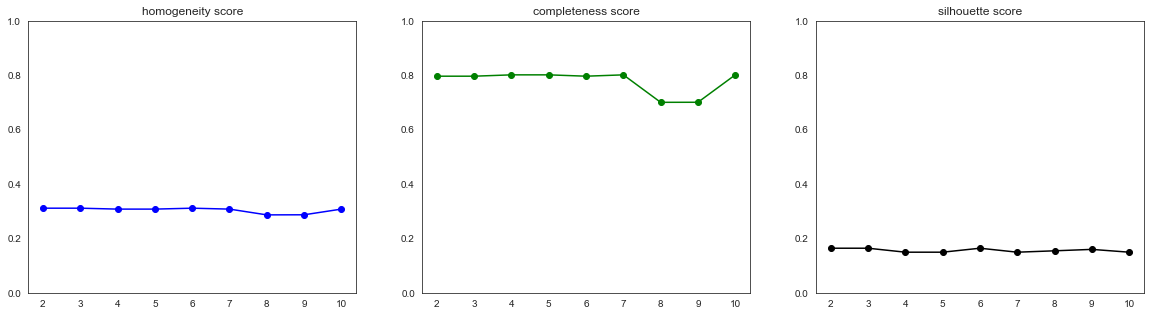

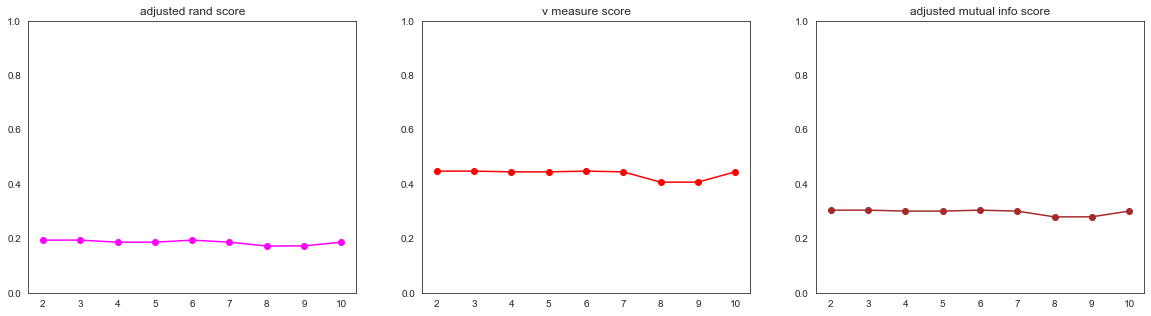

In [244]:
r = [i for i in range(2, 11)]
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("homogeneity score")
plt.plot(r, metric_dict['homo'], marker='o', color='blue')
ax1.set_ylim([0, 1])

ax2 = plt.subplot(1, 3, 2)
ax2.set_title("completeness score")
plt.plot(r, metric_dict['comp'], marker='o', color='green')
ax2.set_ylim([0, 1])

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("silhouette score")
plt.plot(r, metric_dict['silh'], marker='o', color='black')
ax3.set_ylim([0, 1])

fig = plt.figure(figsize=(20, 5))
ax4 = plt.subplot(1, 3, 1)
ax4.set_title("adjusted rand score")
plt.plot(r, metric_dict['adj_rand'], marker='o', color='magenta')
ax4.set_ylim([0, 1])

ax5 = plt.subplot(1, 3, 2)
ax5.set_title("v measure score")
plt.plot(r, metric_dict['v-meas'], marker='o', color="red")
ax5.set_ylim([0, 1])

ax6 = plt.subplot(1, 3, 3)
ax6.set_title("adjusted mutual info score")
plt.plot(r, metric_dict['adj_mutual'], marker='o', color='brown')
ax6.set_ylim([0, 1])

###  Создание модели с оптимальным числом кластеров
Создаем модель, основанную на методе K-Means, с 6 кластерами и выводим значения метрик.

In [245]:
km_model = KMeans(n_clusters=6)
km_model.fit(x)
centroids = km_model.cluster_centers_

In [246]:
hs = metrics.homogeneity_score(y, km_model.labels_)
cs = metrics.completeness_score(y, km_model.labels_)
ms = metrics.v_measure_score(y, km_model.labels_)
ari = metrics.adjusted_rand_score(y, km_model.labels_)
ami = metrics.adjusted_mutual_info_score(y, km_model.labels_)
ss = metrics.silhouette_score(x, km_model.labels_, sample_size=1000)
print("Homogeneity: %0.3f" % hs)
print("Completeness: %0.3f" % cs)
print("V-measure: %0.3f" % ms)
print("Adjusted Rand-Index: %.3f" % ari)
print("Adjusted Mutual Info Score: %.3f" % ami)
print("Silhouette Coefficient: %0.3f" % ss)

Homogeneity: 0.486
Completeness: 0.801
V-measure: 0.605
Adjusted Rand-Index: 0.324
Adjusted Mutual Info Score: 0.472
Silhouette Coefficient: 0.208


### Преобразование исходной выборки для визуализации метода алгоритмами t-SNE и UMAP
Перед применением соответствующих алгоритмов понижения размерности необходимо добавить к исходной выборке координаты центров кластеров. Также в метки классов добавим значения "centroids", соответствующие 6 центрам кластеров, и создадим отдельный датафрейм y1, куда поместим метки элементов выборки, выставленные самим кластеризатором.

In [247]:
c = pd.DataFrame(centroids, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                          '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                          '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                          '31', '32', '33', '34', '35'])
c

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.423271,0.739118,0.881344,0.516112,0.228985,0.613938,0.362516,0.487919,0.253239,0.561044,...,1.286973e-02,6.027687e-03,4.071943e-01,5.044722e-01,2.010628e-01,7.094642e-02,8.938563e-02,1.329339e-01,4.831650e-02,2.844658e-01
1,0.674731,0.258065,0.895161,0.459677,0.612903,0.505376,0.483871,0.177419,0.250000,0.661290,...,0.000000e+00,-3.122502e-17,5.913978e-02,4.435484e-02,9.516129e-01,4.838710e-01,6.290323e-01,6.451613e-02,-4.163336e-17,8.064516e-03
2,0.580717,0.421525,0.822870,0.652466,0.174888,0.633782,0.563528,0.273543,0.300448,0.513453,...,3.885781e-16,1.457168e-16,-9.159340e-16,5.551115e-16,4.484305e-03,-2.359224e-16,4.484305e-03,1.345291e-02,-1.387779e-16,2.242152e-02
3,0.694444,0.303922,0.970588,0.651961,0.049020,0.679739,0.611111,0.328431,0.210784,0.485294,...,0.000000e+00,-3.469447e-17,2.091503e-01,1.691176e-01,9.803922e-03,1.110223e-16,-1.387779e-16,1.526557e-16,1.249001e-16,-1.387779e-17
4,0.837838,0.423717,0.959459,0.743243,0.146751,0.639640,0.729730,0.377058,0.239627,0.356956,...,0.000000e+00,-2.081668e-17,3.243243e-01,4.864865e-01,9.189189e-01,9.189189e-01,5.135135e-01,9.729730e-01,9.729730e-01,3.654330e-02
5,0.739130,0.173913,0.065217,0.550725,0.347826,0.681159,0.666667,0.543478,0.231884,0.492754,...,6.086957e-01,2.898551e-01,5.551115e-17,5.797101e-01,1.665335e-16,-1.526557e-16,6.938894e-17,1.387779e-16,0.000000e+00,-9.714451e-17


In [248]:
xc = pd.concat([x, c], ignore_index=True)
xc

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,1.000000,0.000000,1.000000,0.500000,0.000000,0.333333,0.333333,0.500000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.666667,0.000000,1.000000,0.500000,0.000000,0.666667,0.000000,1.000000,0.500000,0.500000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.500000,0.000000,1.000000,0.500000,0.000000,0.333333,0.000000,1.000000,0.500000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.500000,0.000000,1.000000,0.500000,0.000000,0.333333,0.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1.000000,0.000000,1.000000,0.500000,0.000000,0.666667,0.000000,0.500000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.674731,0.258065,0.895161,0.459677,0.612903,0.505376,0.483871,0.177419,0.250000,0.661290,...,0.000000e+00,-3.122502e-17,5.913978e-02,4.435484e-02,9.516129e-01,4.838710e-01,6.290323e-01,6.451613e-02,-4.163336e-17,8.064516e-03
685,0.580717,0.421525,0.822870,0.652466,0.174888,0.633782,0.563528,0.273543,0.300448,0.513453,...,3.885781e-16,1.457168e-16,-9.159340e-16,5.551115e-16,4.484305e-03,-2.359224e-16,4.484305e-03,1.345291e-02,-1.387779e-16,2.242152e-02
686,0.694444,0.303922,0.970588,0.651961,0.049020,0.679739,0.611111,0.328431,0.210784,0.485294,...,0.000000e+00,-3.469447e-17,2.091503e-01,1.691176e-01,9.803922e-03,1.110223e-16,-1.387779e-16,1.526557e-16,1.249001e-16,-1.387779e-17
687,0.837838,0.423717,0.959459,0.743243,0.146751,0.639640,0.729730,0.377058,0.239627,0.356956,...,0.000000e+00,-2.081668e-17,3.243243e-01,4.864865e-01,9.189189e-01,9.189189e-01,5.135135e-01,9.729730e-01,9.729730e-01,3.654330e-02


In [249]:
res = ['centroids' for i in range(6)]
rs = pd.DataFrame(res)
yc = pd.concat([y, rs], ignore_index=True)
yc

,0
0,diaporthe-stem-canker
1,diaporthe-stem-canker
2,diaporthe-stem-canker
3,diaporthe-stem-canker
4,diaporthe-stem-canker
...,...
684,centroids
685,centroids
686,centroids
687,centroids


In [250]:
y1 = pd.DataFrame(km_model.labels_)
y1

,0
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,0
681,0


### Визуализация полученных результатов с помощью алгоритма t-SNE
Построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

In [3]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 689 samples in 0.001s...
[t-SNE] Computed neighbors for 689 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 689 / 689
[t-SNE] Mean sigma: 0.800684
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.592587
[t-SNE] KL divergence after 2000 iterations: 0.323087


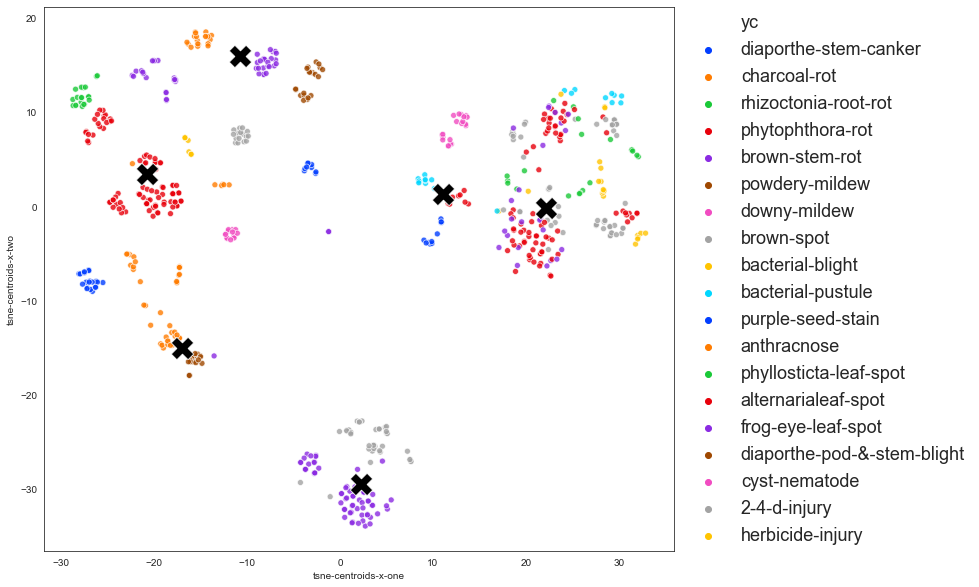

In [252]:
x_embedded = TSNE(n_components=2, verbose=1, perplexity=40, 
                  early_exaggeration=12, metric='euclidean',
                 learning_rate=100, n_iter=2000).fit_transform(xc)

x_df = pd.DataFrame()
x_df['tsne-2d-one'] = x_embedded[:683,0]
x_df['tsne-2d-two'] = x_embedded[:683,1]
x_df['yc'] = yc[:683]

c_df = pd.DataFrame()
c_df['tsne-centroids-x-one'] = x_embedded[683:, 0]
c_df['tsne-centroids-x-two'] = x_embedded[683:, 1]
c_df['tsne-centroids-y'] = yc[683:]

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="yc", 
                palette=sns.color_palette("bright", 19), 
                data=x_df, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

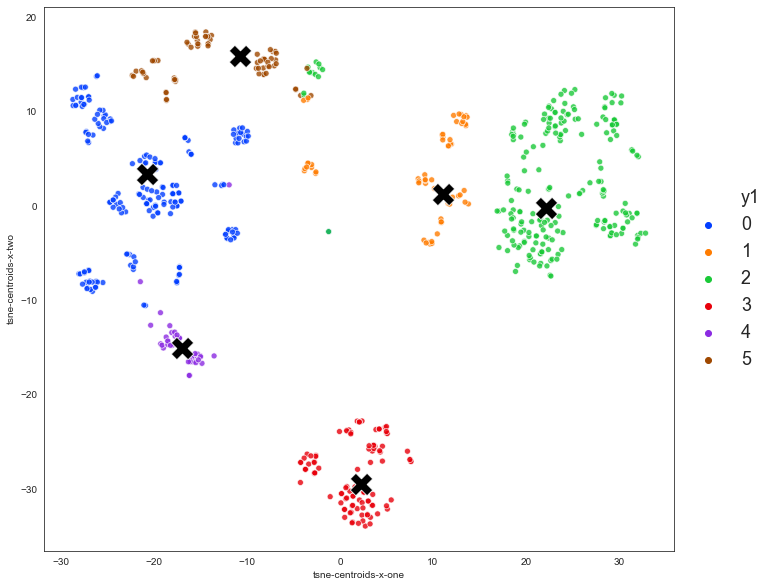

In [253]:
x1_df = pd.DataFrame()
x1_df['tsne-2d-one'] = x_embedded[:683,0]
x1_df['tsne-2d-two'] = x_embedded[:683,1]
x1_df['y1'] = y1

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 6), 
                data=x1_df, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

### Визуализация полученных результатов с помощью алгоритма UMAP
Так же как и в случае с t-SNE, построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

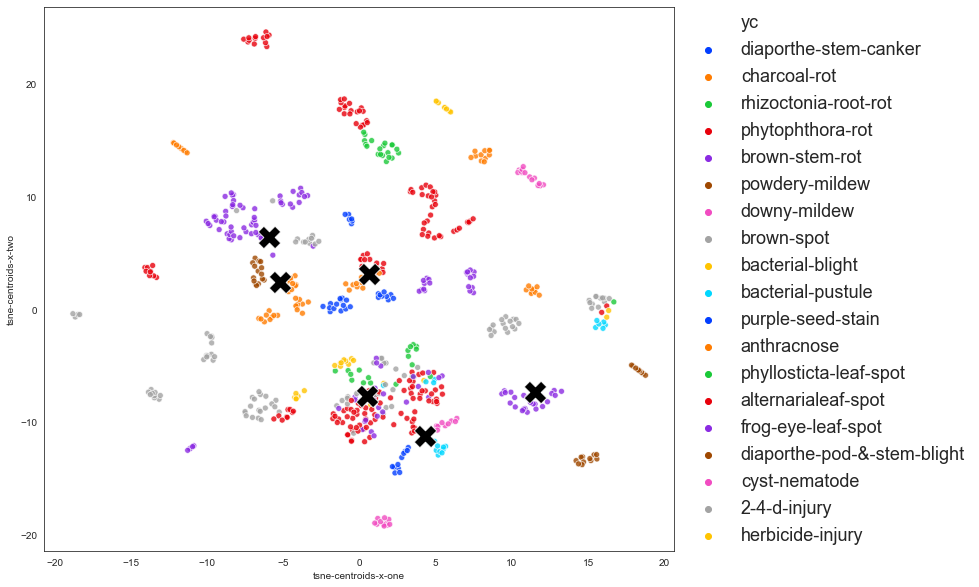

In [255]:
import umap

x_embedded_k = umap.UMAP(n_neighbors=5, min_dist=0.8, metric='euclidean').fit_transform(xc)
x_df_k = pd.DataFrame()
x_df_k['tsne-2d-one'] = x_embedded_k[:683, 0]
x_df_k['tsne-2d-two'] = x_embedded_k[:683, 1]
x_df_k['yc'] = yc[:683]

c_df_k = pd.DataFrame()
c_df_k['tsne-centroids-x-one'] = x_embedded_k[683:, 0]
c_df_k['tsne-centroids-x-two'] = x_embedded_k[683:, 1]
c_df_k['tsne-centroids-y'] = yc[683:]

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="yc", 
                palette=sns.color_palette("bright", 19), 
                data=x_df_k,legend="full", alpha=0.8)
sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df_k, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

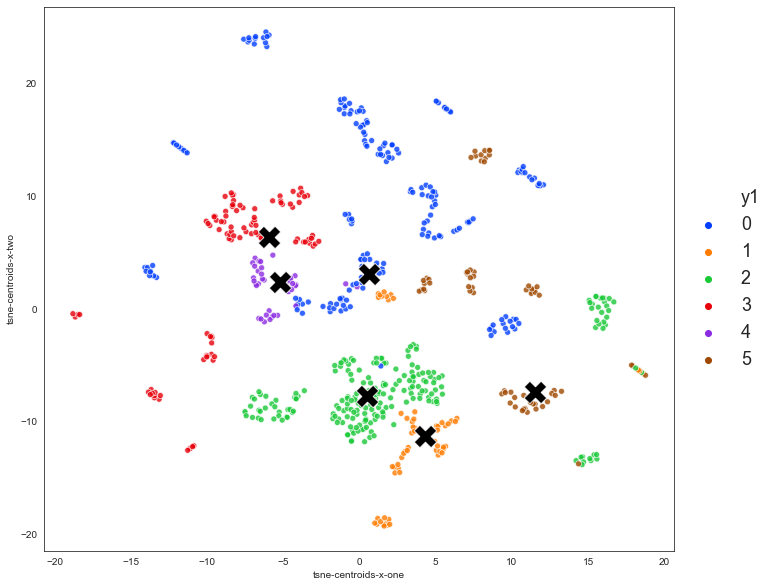

In [256]:
x1_df_k = pd.DataFrame()
x1_df_k['tsne-2d-one'] = x_embedded_k[:683,0]
x1_df_k['tsne-2d-two'] = x_embedded_k[:683,1]
x1_df_k['y1'] = y1

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 6), 
                data=x1_df_k, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df_k, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Метод Fuzzy C-Means (FCM)
Данный метод лучше работает, если исходные данные сразу преобразовать к двумерному пространству. Поэтому рассмотрим два его варианта - с преобразованием данных с помощью t-SNE и с помщью UMAP.
### Преобразование исходной выборки с помощью алгоритма t-SNE

In [157]:
x_embedded_1 = TSNE(n_components=2, verbose=1, perplexity=40, 
                  early_exaggeration=12, metric='euclidean',
                 learning_rate=100, n_iter=2000).fit_transform(x)

x_df_1 = pd.DataFrame()
x_df_1['tsne-2d-one'] = x_embedded_1[:,0]
x_df_1['tsne-2d-two'] = x_embedded_1[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 683 samples in 0.001s...
[t-SNE] Computed neighbors for 683 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 683 / 683
[t-SNE] Mean sigma: 0.810272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.660389
[t-SNE] KL divergence after 2000 iterations: 0.317280


In [158]:
x_df_1

,tsne-2d-one,tsne-2d-two
0,1.253581,27.624500
1,2.299013,26.401896
2,2.851558,26.125542
3,2.497003,26.138641
4,1.815150,25.607492
...,...,...
678,11.254866,6.372206
679,12.921271,11.545925
680,12.931370,11.551739
681,11.084483,11.481220


### Подбор оптимального числа кластеров
Для из подбора будем использовать те же самые метрики, что и в методе K-Means.

In [159]:
from fcmeans import FCM

metric_dict_fcm = {'homo': [], 'comp': [], 'v-meas': [], 'adj_rand': [], 'silh': [], 'adj_mutual': []}
for i in range(2, 11):
    fcm_model = FCM(n_clusters=i)
    fcm_model.fit(x_df_1)
    metric_dict_fcm['homo'].append(metrics.homogeneity_score(y, fcm_model.u.argmax(axis=1)))
    metric_dict_fcm['comp'].append(metrics.completeness_score(y, fcm_model.u.argmax(axis=1)))
    metric_dict_fcm['v-meas'].append(metrics.v_measure_score(y, fcm_model.u.argmax(axis=1)))
    metric_dict_fcm['adj_mutual'].append(metrics.adjusted_mutual_info_score(y, fcm_model.u.argmax(axis=1)))
    metric_dict_fcm['adj_rand'].append(metrics.adjusted_rand_score(y, fcm_model.u.argmax(axis=1)))
    metric_dict_fcm['silh'].append(metrics.silhouette_score(x, fcm_model.u.argmax(axis=1), sample_size=1000))

### Построение графиков для метрик
По графикам видно, что определяющие метрики, а именно гомогенность, полнота и силуэт, принимают наилучшие значения при количестве кластеров, равном 4. Именно это число кластеров и было выбрано для итоговой модели.

(0.1, 1)

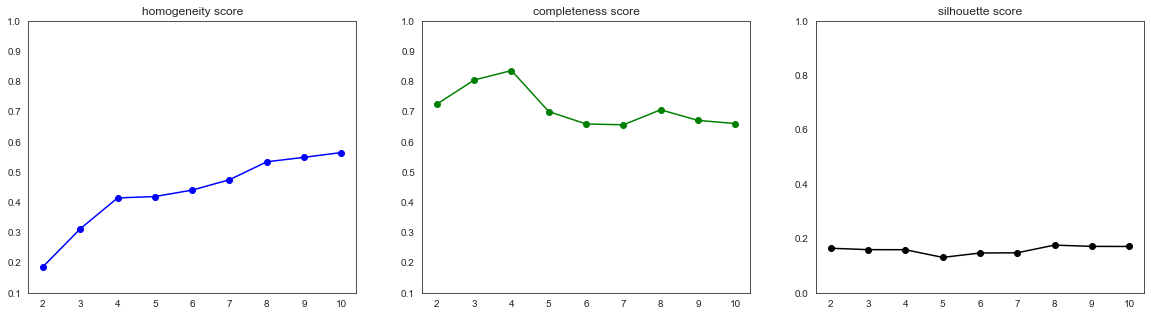

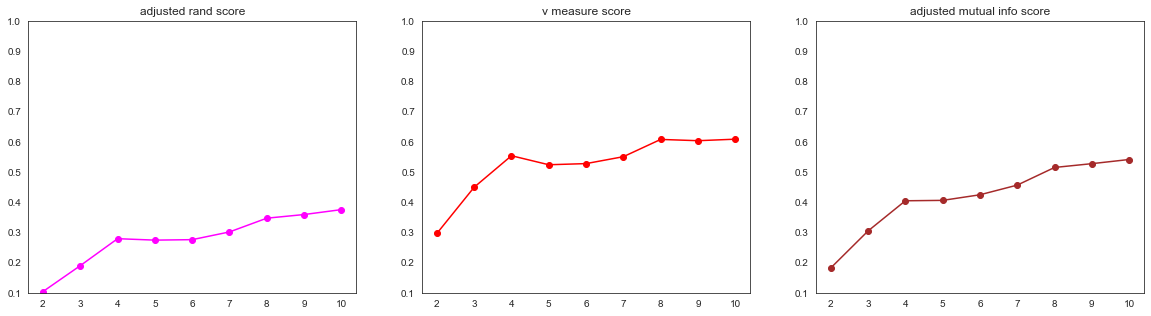

In [160]:
r = [i for i in range(2, 11)]
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("homogeneity score")
plt.plot(r, metric_dict_fcm['homo'], marker='o', color='blue')
ax1.set_ylim([0.1, 1])

ax2 = plt.subplot(1, 3, 2)
ax2.set_title("completeness score")
plt.plot(r, metric_dict_fcm['comp'], marker='o', color='green')
ax2.set_ylim([0.1, 1])

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("silhouette score")
plt.plot(r, metric_dict_fcm['silh'], marker='o', color='black')
ax3.set_ylim([0, 1])

fig = plt.figure(figsize=(20, 5))
ax4 = plt.subplot(1, 3, 1)
ax4.set_title("adjusted rand score")
plt.plot(r, metric_dict_fcm['adj_rand'], marker='o', color='magenta')
ax4.set_ylim([0.1, 1])

ax5 = plt.subplot(1, 3, 2)
ax5.set_title("v measure score")
plt.plot(r, metric_dict_fcm['v-meas'], marker='o', color="red")
ax5.set_ylim([0.1, 1])

ax6 = plt.subplot(1, 3, 3)
ax6.set_title("adjusted mutual info score")
plt.plot(r, metric_dict_fcm['adj_mutual'], marker='o', color='brown')
ax6.set_ylim([0.1, 1])

### Создание модели с оптимальным числом кластеров
Создаем FCM модель с количеством кластеров, равным 4, и выводим значения метрик.

In [161]:
fcm_model = FCM(n_clusters=4)
fcm_model.fit(x_df_1)
centers = fcm_model.centers

In [163]:
hs_1 = metrics.homogeneity_score(y, fcm_model.u.argmax(axis=1))
cs_1 = metrics.completeness_score(y, fcm_model.u.argmax(axis=1))
ms_1 = metrics.v_measure_score(y, fcm_model.u.argmax(axis=1))
ari_1 = metrics.adjusted_rand_score(y, fcm_model.u.argmax(axis=1))
ami_1 = metrics.adjusted_mutual_info_score(y, fcm_model.u.argmax(axis=1))
ss_1 = metrics.silhouette_score(x, fcm_model.u.argmax(axis=1), sample_size=1000)
print("Homogeneity: %0.3f" % hs_1)
print("Completeness: %0.3f" % cs_1)
print("V-measure: %0.3f" % ms_1)
print("Adjusted Rand-Index: %.3f" % ari_1)
print("Adjusted Mutual Info Score: %.3f" % ami_1)
print("Silhouette Coefficient: %0.3f" % ss_1)

Homogeneity: 0.414
Completeness: 0.836
V-measure: 0.554
Adjusted Rand-Index: 0.279
Adjusted Mutual Info Score: 0.405
Silhouette Coefficient: 0.159


### Создание датафрейма с центрами кластеров
Чтобы отобразить на графиках полученные центры кластеров, поместим их координаты в отдельный датафрейм и сопоставим им соответствующие метки "centers".

In [162]:
centers

,tsne-2d-one,tsne-2d-two
0,-3.476694,-23.912271
1,6.326920,18.209551
2,14.908150,4.580190
3,-25.386590,6.597300


In [165]:
res_fcm = ['centers' for i in range(4)]
rs_fcm = pd.DataFrame(res_fcm)
rs_fcm

,0
0,centers
1,centers
2,centers
3,centers


In [166]:
centers['yc'] = rs_fcm
centers

,tsne-2d-one,tsne-2d-two,yc
0,-3.476694,-23.912271,centers
1,6.326920,18.209551,centers
2,14.908150,4.580190,centers
3,-25.386590,6.597300,centers


In [167]:
y1_fcm = pd.DataFrame(fcm_model.u.argmax(axis=1))
y1_fcm

,0
0,1
1,1
2,1
3,1
4,1
...,...
678,2
679,2
680,2
681,2


### Визуализация полученных результатов
Построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

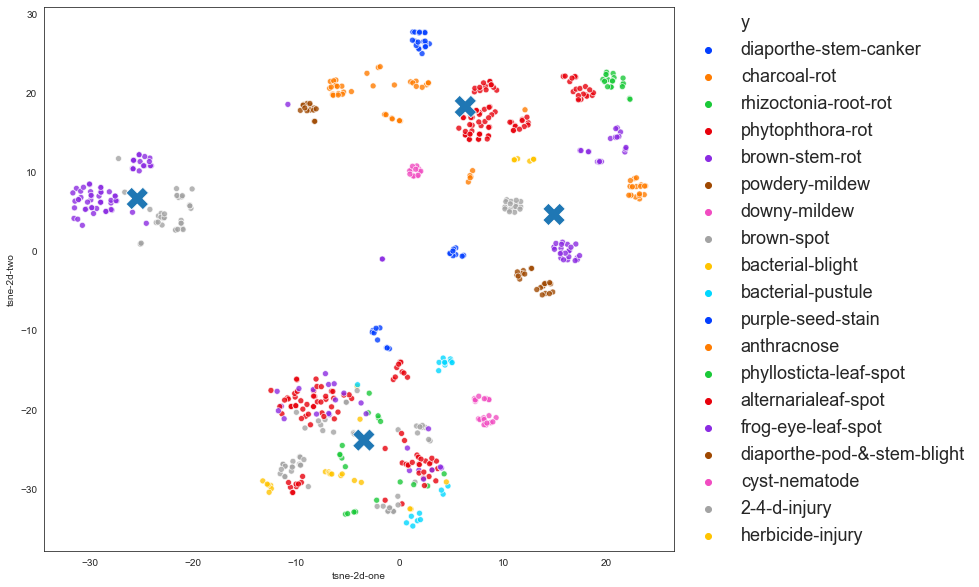

In [168]:
x_df_1['y'] = y.values
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y", 
                palette=sns.color_palette("bright", 19), 
                data=x_df_1, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

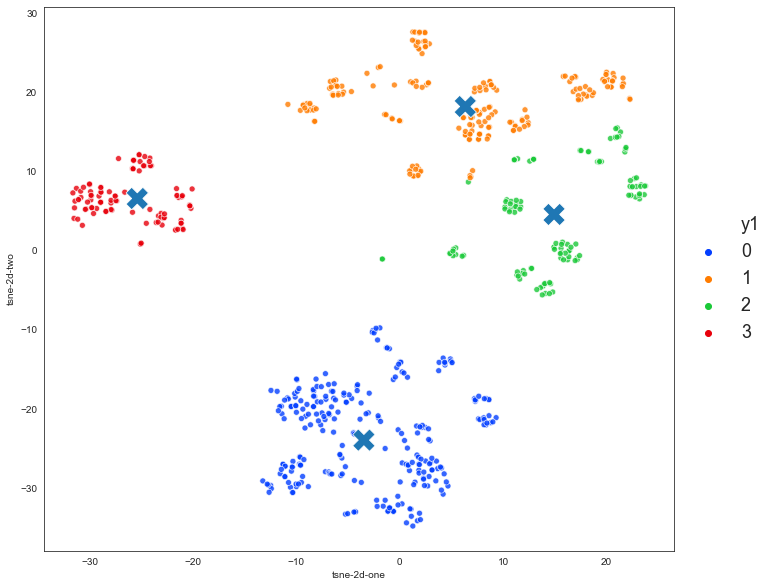

In [169]:
x_df_1['y1'] = y1_fcm
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 4), 
                data=x_df_1, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

### Преобразование исходной выборки с помощью алгоритма UMAP

In [173]:
x_embedded_2 = umap.UMAP(n_neighbors=5, min_dist=0.8, metric='euclidean').fit_transform(x)
x_df_2 = pd.DataFrame()
x_df_2['tsne-2d-one'] = x_embedded_2[:, 0]
x_df_2['tsne-2d-two'] = x_embedded_2[:, 1]

### Подбор оптимального числа кластеров

In [174]:
metric_dict_fcm = {'homo': [], 'comp': [], 'v-meas': [], 'adj_rand': [], 'silh': [], 'adj_mutual': []}
for i in range(2, 11):
    fcm_model_1 = FCM(n_clusters=i)
    fcm_model_1.fit(x_df_2)
    metric_dict_fcm['homo'].append(metrics.homogeneity_score(y, fcm_model_1.u.argmax(axis=1)))
    metric_dict_fcm['comp'].append(metrics.completeness_score(y, fcm_model_1.u.argmax(axis=1)))
    metric_dict_fcm['v-meas'].append(metrics.v_measure_score(y, fcm_model_1.u.argmax(axis=1)))
    metric_dict_fcm['adj_mutual'].append(metrics.adjusted_mutual_info_score(y, fcm_model_1.u.argmax(axis=1)))
    metric_dict_fcm['adj_rand'].append(metrics.adjusted_rand_score(y, fcm_model_1.u.argmax(axis=1)))
    metric_dict_fcm['silh'].append(metrics.silhouette_score(x, fcm_model_1.u.argmax(axis=1), sample_size=1000))

### Построение графиков для метрик
Так же как и в случае с алгоритмом t-SNE, выберем 4 кластера в качестве их оптимального количества.

(0.1, 1)

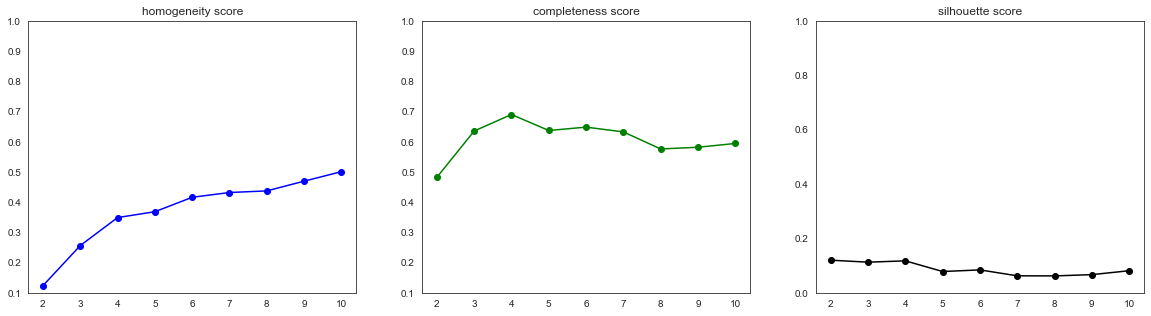

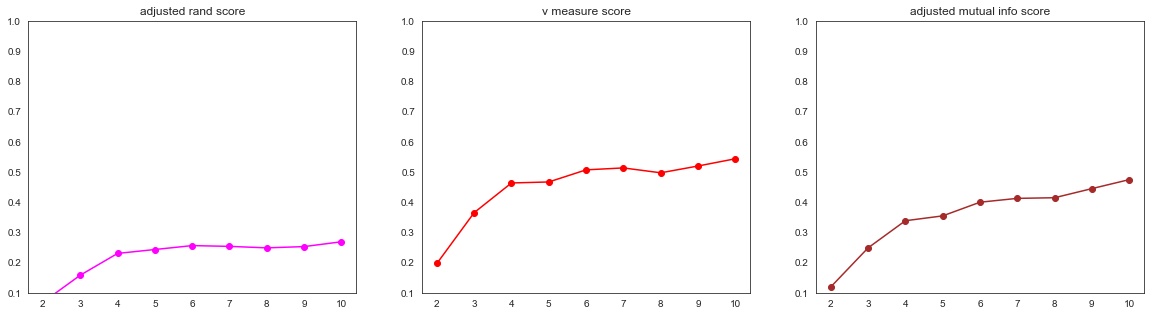

In [175]:
r = [i for i in range(2, 11)]
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("homogeneity score")
plt.plot(r, metric_dict_fcm['homo'], marker='o', color='blue')
ax1.set_ylim([0.1, 1])

ax2 = plt.subplot(1, 3, 2)
ax2.set_title("completeness score")
plt.plot(r, metric_dict_fcm['comp'], marker='o', color='green')
ax2.set_ylim([0.1, 1])

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("silhouette score")
plt.plot(r, metric_dict_fcm['silh'], marker='o', color='black')
ax3.set_ylim([0, 1])

fig = plt.figure(figsize=(20, 5))
ax4 = plt.subplot(1, 3, 1)
ax4.set_title("adjusted rand score")
plt.plot(r, metric_dict_fcm['adj_rand'], marker='o', color='magenta')
ax4.set_ylim([0.1, 1])

ax5 = plt.subplot(1, 3, 2)
ax5.set_title("v measure score")
plt.plot(r, metric_dict_fcm['v-meas'], marker='o', color="red")
ax5.set_ylim([0.1, 1])

ax6 = plt.subplot(1, 3, 3)
ax6.set_title("adjusted mutual info score")
plt.plot(r, metric_dict_fcm['adj_mutual'], marker='o', color='brown')
ax6.set_ylim([0.1, 1])

### Создание модели с оптимальным числом кластеров
Создаем FCM модель с количеством кластеров, равным 4, и выводим значения метрик.

In [176]:
fcm_model_1 = FCM(n_clusters=4)
fcm_model_1.fit(x_df_2)
centers_1 = fcm_model_1.centers

In [177]:
hs_2 = metrics.homogeneity_score(y, fcm_model_1.u.argmax(axis=1))
cs_2 = metrics.completeness_score(y, fcm_model_1.u.argmax(axis=1))
ms_2 = metrics.v_measure_score(y, fcm_model_1.u.argmax(axis=1))
ari_2 = metrics.adjusted_rand_score(y, fcm_model_1.u.argmax(axis=1))
ami_2 = metrics.adjusted_mutual_info_score(y, fcm_model_1.u.argmax(axis=1))
ss_2 = metrics.silhouette_score(x, fcm_model_1.u.argmax(axis=1), sample_size=1000)
print("Homogeneity: %0.3f" % hs_2)
print("Completeness: %0.3f" % cs_2)
print("V-measure: %0.3f" % ms_2)
print("Adjusted Rand-Index: %.3f" % ari_2)
print("Adjusted Mutual Info Score: %.3f" % ami_2)
print("Silhouette Coefficient: %0.3f" % ss_2)

Homogeneity: 0.349
Completeness: 0.690
V-measure: 0.464
Adjusted Rand-Index: 0.230
Adjusted Mutual Info Score: 0.339
Silhouette Coefficient: 0.118


### Создание датафрейма с центрами кластеров
Чтобы отобразить на графиках полученные центры кластеров, поместим их координаты в отдельный датафрейм и сопоставим им соответствующие метки "centers".

In [178]:
res_fcm_1 = ['centers' for i in range(4)]
rs_fcm_1 = pd.DataFrame(res_fcm_1)
rs_fcm_1

,0
0,centers
1,centers
2,centers
3,centers


In [179]:
centers_1['yc'] = rs_fcm_1
centers_1

,tsne-2d-one,tsne-2d-two,yc
0,1.021294,-8.626119,centers
1,8.203226,0.893053,centers
2,-12.512359,-2.957293,centers
3,-1.513129,12.099896,centers


In [180]:
y1_fcm_1 = pd.DataFrame(fcm_model_1.u.argmax(axis=1))
y1_fcm_1

,0
0,3
1,3
2,3
3,3
4,3
...,...
678,3
679,0
680,0
681,0


### Визуализация полученных результатов
Построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

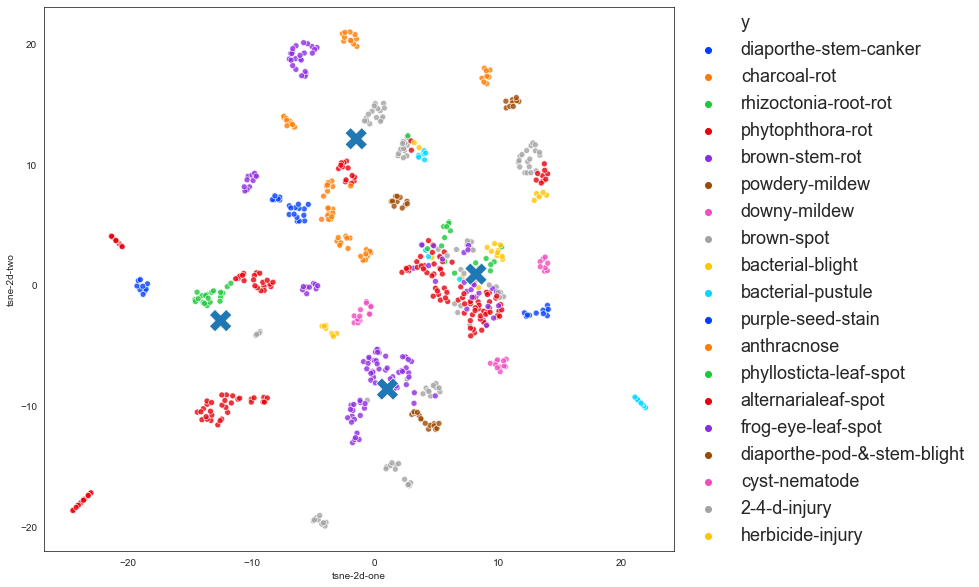

In [181]:
x_df_2['y'] = y.values
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y", 
                palette=sns.color_palette("bright", 19), 
                data=x_df_2, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers_1, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

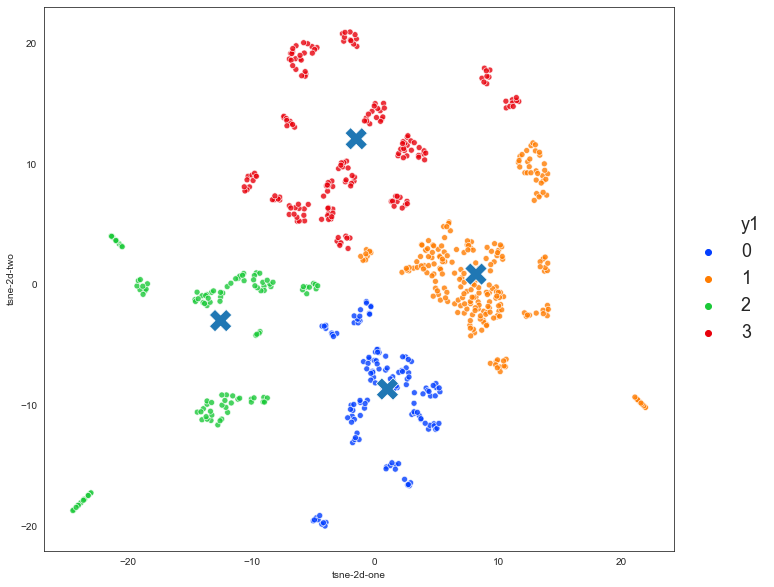

In [182]:
x_df_2['y1'] = y1_fcm_1
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 4), 
                data=x_df_2, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers_1, legend=False, 
                alpha=1, marker='X', s=500, color='black')
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Метод DBSCAN
Данный метод, в отличие от K-Means и FCM, оперирует плотностью данных и не требует указания числа кластеров, на которые нужно разбить выборку - их количество он определит самостоятельно. На вход же ему подаются два других параметра:
* **min_samples** - минимальное число точек в окрестности (минимальное число соседей)
* **eps** - максимальное расстояние между точками

Рассмотрим различные варианты этих параметров и подберем оптимальные.
### Подбор значения параметра min_samples
Минимальное число точек в окрестности будем выбирать в диапазоне от 2 до 11.

In [188]:
from sklearn.cluster import DBSCAN

metric_dict_dbs = {'homo': [], 'comp': [], 'v-meas': [], 'adj_rand': [], 'silh': [], 'adj_mutual': []}
eps = [i for i in range(2, 11)]
for i in eps:
    dbs_model = DBSCAN(min_samples=i)
    dbs_model.fit(x)
    metric_dict_dbs['homo'].append(metrics.homogeneity_score(y, dbs_model.labels_))
    metric_dict_dbs['comp'].append(metrics.completeness_score(y, dbs_model.labels_))
    metric_dict_dbs['v-meas'].append(metrics.v_measure_score(y, dbs_model.labels_))
    metric_dict_dbs['adj_mutual'].append(metrics.adjusted_mutual_info_score(y, dbs_model.labels_))
    metric_dict_dbs['adj_rand'].append(metrics.adjusted_rand_score(y, dbs_model.labels_))
    metric_dict_dbs['silh'].append(metrics.silhouette_score(x, dbs_model.labels_, sample_size=1000))

### Построение графиков для метрик (параметр min_samples)
Наилучшие результаты метод показывает при количестве минимальных точек в окрестности, равном 2.

(-1, 1)

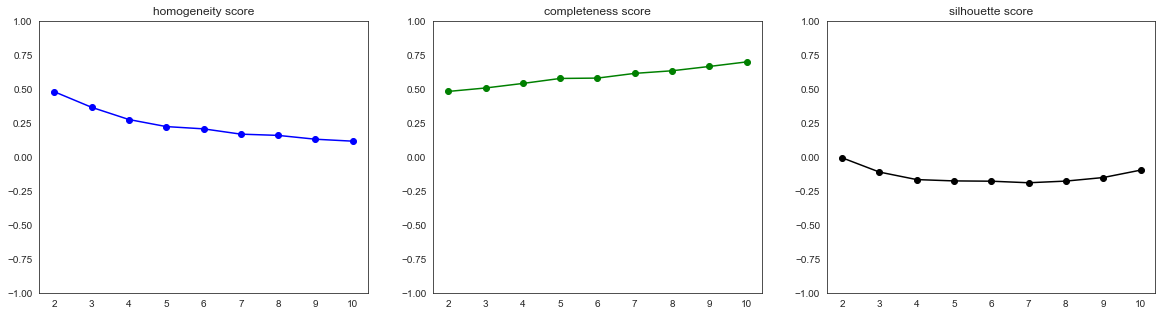

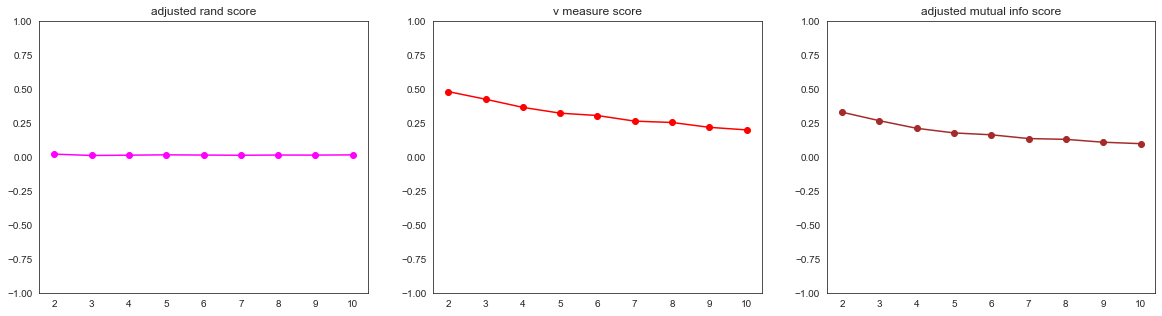

In [189]:
r = [i for i in range(2, 11)]
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("homogeneity score")
plt.plot(r, metric_dict_dbs['homo'], marker='o', color='blue')
ax1.set_ylim([-1, 1])

ax2 = plt.subplot(1, 3, 2)
ax2.set_title("completeness score")
plt.plot(r, metric_dict_dbs['comp'], marker='o', color='green')
ax2.set_ylim([-1, 1])

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("silhouette score")
plt.plot(r, metric_dict_dbs['silh'], marker='o', color='black')
ax3.set_ylim([-1, 1])

fig = plt.figure(figsize=(20, 5))
ax4 = plt.subplot(1, 3, 1)
ax4.set_title("adjusted rand score")
plt.plot(r, metric_dict_dbs['adj_rand'], marker='o', color='magenta')
ax4.set_ylim([-1, 1])

ax5 = plt.subplot(1, 3, 2)
ax5.set_title("v measure score")
plt.plot(r, metric_dict_dbs['v-meas'], marker='o', color="red")
ax5.set_ylim([-1, 1])

ax6 = plt.subplot(1, 3, 3)
ax6.set_title("adjusted mutual info score")
plt.plot(r, metric_dict_dbs['adj_mutual'], marker='o', color='brown')
ax6.set_ylim([-1, 1])

### Подбор значения параметра eps
Максимальное расстояние между точками будем выбирать, исходя из значений, представленных в массиве eps.

In [190]:
metric_dict_dbs = {'homo': [], 'comp': [], 'v-meas': [], 'adj_rand': [], 'silh': [], 'adj_mutual': []}
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9, 1, 1.5, 2]
for i in eps:
    dbs_model = DBSCAN(eps=i)
    dbs_model.fit(x)
    metric_dict_dbs['homo'].append(metrics.homogeneity_score(y, dbs_model.labels_))
    metric_dict_dbs['comp'].append(metrics.completeness_score(y, dbs_model.labels_))
    metric_dict_dbs['v-meas'].append(metrics.v_measure_score(y, dbs_model.labels_))
    metric_dict_dbs['adj_mutual'].append(metrics.adjusted_mutual_info_score(y, dbs_model.labels_))
    metric_dict_dbs['adj_rand'].append(metrics.adjusted_rand_score(y, dbs_model.labels_))
    metric_dict_dbs['silh'].append(metrics.silhouette_score(x, dbs_model.labels_, sample_size=1000))

### Построение графиков для метрик (параметр eps)
Наилучшие результаты метод показывает при максимальном расстоянии между точками, равном 1.5.

(-1, 1)

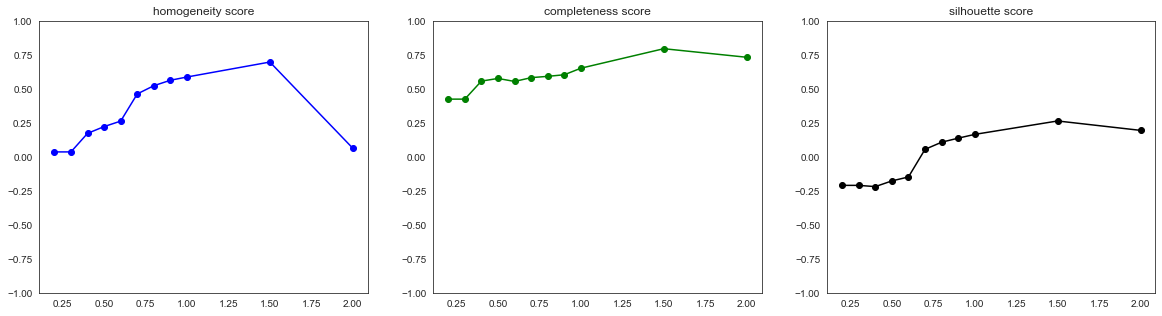

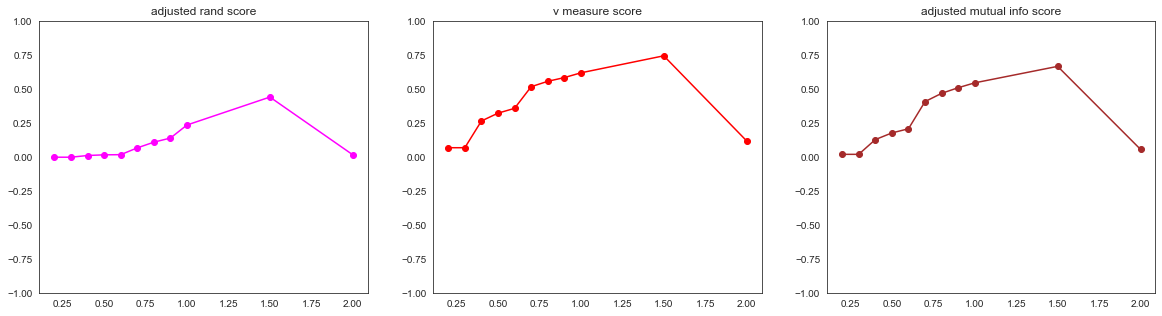

In [191]:
r = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9, 1, 1.5, 2]
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("homogeneity score")
plt.plot(r, metric_dict_dbs['homo'], marker='o', color='blue')
ax1.set_ylim([-1, 1])

ax2 = plt.subplot(1, 3, 2)
ax2.set_title("completeness score")
plt.plot(r, metric_dict_dbs['comp'], marker='o', color='green')
ax2.set_ylim([-1, 1])

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("silhouette score")
plt.plot(r, metric_dict_dbs['silh'], marker='o', color='black')
ax3.set_ylim([-1, 1])

fig = plt.figure(figsize=(20, 5))
ax4 = plt.subplot(1, 3, 1)
ax4.set_title("adjusted rand score")
plt.plot(r, metric_dict_dbs['adj_rand'], marker='o', color='magenta')
ax4.set_ylim([-1, 1])

ax5 = plt.subplot(1, 3, 2)
ax5.set_title("v measure score")
plt.plot(r, metric_dict_dbs['v-meas'], marker='o', color="red")
ax5.set_ylim([-1, 1])

ax6 = plt.subplot(1, 3, 3)
ax6.set_title("adjusted mutual info score")
plt.plot(r, metric_dict_dbs['adj_mutual'], marker='o', color='brown')
ax6.set_ylim([-1, 1])

### Создание модели с оптимальными параметрами
Создаем модель, основанную на методе DBSCAN, с параметрами min_samples и eps, равными 2 и 1.5 соответственно, и выводим значения метрик.

In [192]:
dbs_model = DBSCAN(eps=1.5, min_samples=2)
dbs_model.fit(x)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [193]:
hs_3 = metrics.homogeneity_score(y, dbs_model.labels_)
cs_3 = metrics.completeness_score(y, dbs_model.labels_)
ms_3 = metrics.v_measure_score(y, dbs_model.labels_)
ari_3 = metrics.adjusted_rand_score(y, dbs_model.labels_)
ami_3 = metrics.adjusted_mutual_info_score(y, dbs_model.labels_)
ss_3 = metrics.silhouette_score(x, dbs_model.labels_, sample_size=1000)
print("Homogeneity: %0.3f" % hs_3)
print("Completeness: %0.3f" % cs_3)
print("V-measure: %0.3f" % ms_3)
print("Adjusted Rand-Index: %.3f" % ari_3)
print("Adjusted Mutual Info Score: %.3f" % ami_3)
print("Silhouette Coefficient: %0.3f" % ss_3)

Homogeneity: 0.724
Completeness: 0.802
V-measure: 0.761
Adjusted Rand-Index: 0.445
Adjusted Mutual Info Score: 0.690
Silhouette Coefficient: 0.274


### Создание датафрейма со значениями меток кластеризатора
Создадим отдельный датафрейм, куда поместим значения меток, выставленные самим кластеризатором DBSCAN.

In [194]:
y1_dbs = pd.DataFrame(dbs_model.labels_)
y1_dbs

,0
0,0
1,0
2,0
3,0
4,0
...,...
678,23
679,2
680,2
681,2


### Визуализация полученных результатов с помощью алгоритма t-SNE
Построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 683 samples in 0.001s...
[t-SNE] Computed neighbors for 683 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 683 / 683
[t-SNE] Mean sigma: 0.810272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.665321
[t-SNE] KL divergence after 2000 iterations: 0.315050


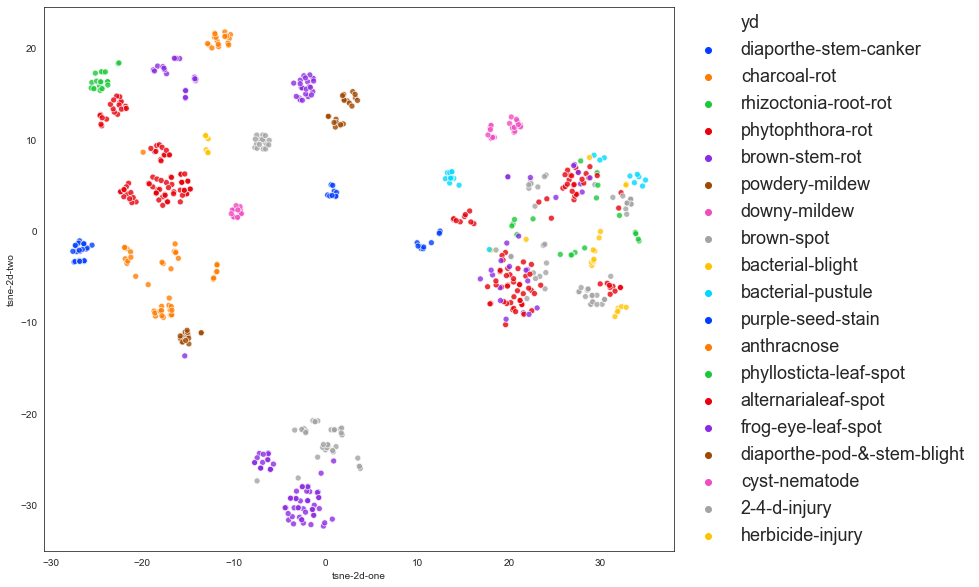

In [195]:
x_embedded_3 = TSNE(n_components=2, verbose=1, perplexity=40, 
                  early_exaggeration=12, metric='euclidean',
                 learning_rate=100, n_iter=2000).fit_transform(x)

x2_df = pd.DataFrame()
x2_df['tsne-2d-one'] = x_embedded_3[:,0]
x2_df['tsne-2d-two'] = x_embedded_3[:,1]
x2_df['yd'] = y.values
x2_df['y1'] = y1_dbs

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="yd", 
                palette=sns.color_palette("bright", 19), 
                data=x2_df, legend="full", alpha=0.8)
plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

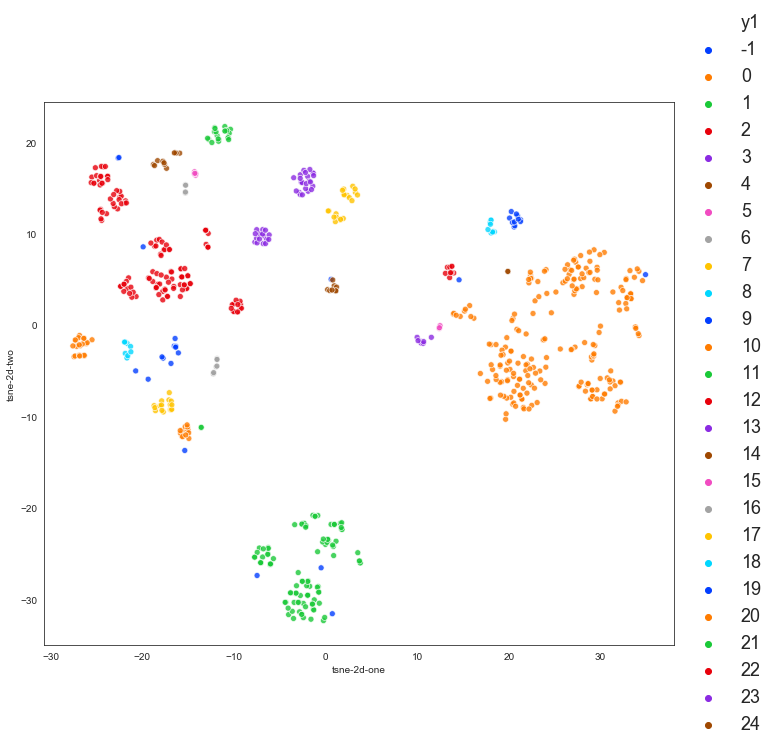

In [196]:
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 26), 
                data=x2_df, legend="full", alpha=0.8)

plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

### Визуализация полученных результатов с помощью алгоритма UMAP
Так же как и с алгоритмом t-SNE, построим два рисунка разбиения на кластеры - на одном цвета точек будут соответствовать классам, указанным в выборке, а на другом - выставленным кластеризатором.

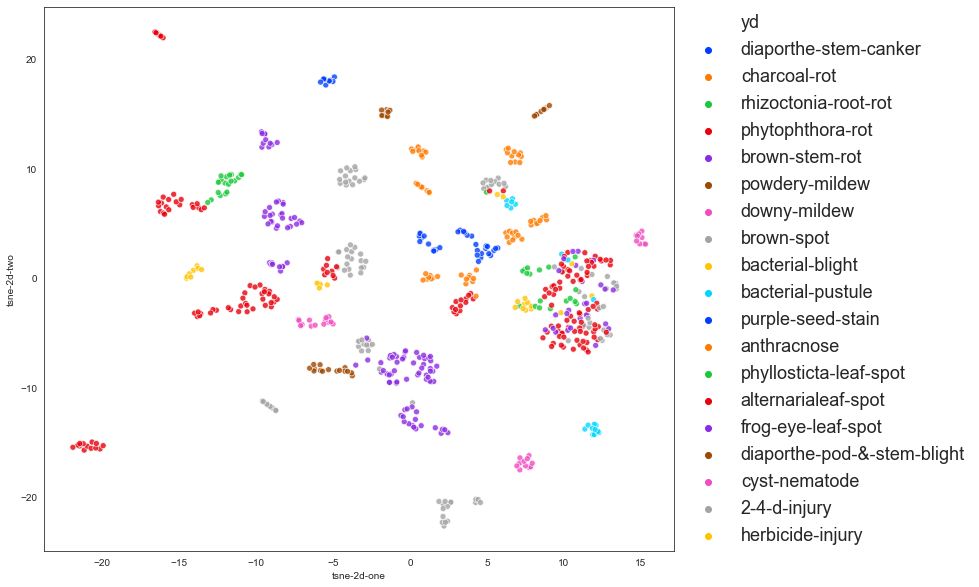

In [197]:
import umap

x_embedded_4 = umap.UMAP(n_neighbors=5, min_dist=0.8, metric='euclidean').fit_transform(x)
x2_df_1 = pd.DataFrame()
x2_df_1['tsne-2d-one'] = x_embedded_4[:, 0]
x2_df_1['tsne-2d-two'] = x_embedded_4[:, 1]
x2_df_1['yd'] = y.values
x2_df_1['y1'] = y1_dbs

fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="yd", 
                palette=sns.color_palette("bright", 19), 
                data=x2_df_1,legend="full", alpha=0.8)

plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

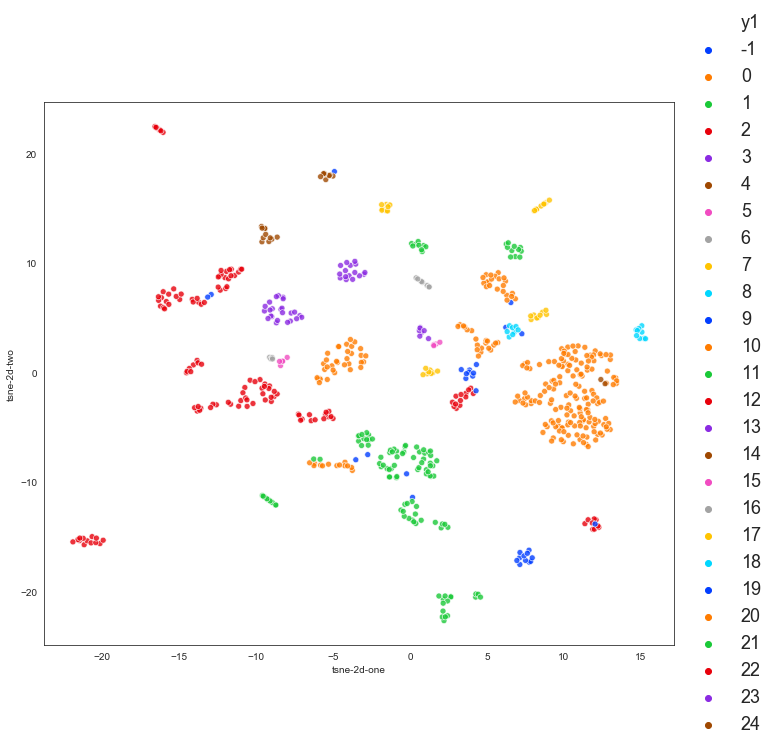

In [198]:
fig = plt.figure(figsize=(14, 10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 26), 
                data=x2_df_1, legend="full", alpha=0.8)

plt.legend(frameon=False, bbox_to_anchor=(1,0.5), loc="center left",prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Сравнение результатов кластеризации
### Сравнение метрик оценки результатов кластеризации
Для начала выведем значения метрик оценки качества кластеризации, полученные при построении различных кластеризаторов:
* K-Means
* FCM с преобразованием исходных данных с помощью алгоритма t-SNE
* FCM с преобразованием исходных данных с помощью алгоритма UMAP
* DBSCAN

In [259]:
print(' ' * 10, '   K-Means\tFCM 1\tFCM 2\tDBSCAN')
print("Homogenity\t%0.3f" % hs, "\t%0.3f" % hs_1, "\t%0.3f" % hs_2, "\t%0.3f" % hs_3)
print("Completness\t%0.3f" % cs, "\t%0.3f" % cs_1, "\t%0.3f" % cs_2, "\t%0.3f" % cs_3)
print("Silhoette\t%0.3f" % ss, "\t%0.3f" % ss_1, "\t%0.3f" % ss_2, "\t%0.3f" % ss_3)
print("V-measure\t%0.3f" % ms, "\t%0.3f" % ms_1, "\t%0.3f" % ms_2, "\t%0.3f" % ms_3)
print("ARI\t\t%0.3f" % ari, "\t%0.3f" % ari_1, "\t%0.3f" % ari_2, "\t%0.3f" % ari_3)
print("AMI\t\t%0.3f" % ami, "\t%0.3f" % ami_1, "\t%0.3f" % ami_2, "\t%0.3f" % ami_3)

              K-Means	FCM 1	FCM 2	DBSCAN
Homogenity	0.486 	0.414 	0.349 	0.724
Completness	0.801 	0.836 	0.690 	0.802
Silhoette	0.208 	0.159 	0.118 	0.274
V-measure	0.605 	0.554 	0.464 	0.761
ARI		0.324 	0.279 	0.230 	0.445
AMI		0.472 	0.405 	0.339 	0.690


In [9]:
hms = {'K-Means': 0.486, 'FCM 1': 0.414, 'FCM 2': 0.349, 'DBSCAN': 0.724}
cms = {'K-Means': 0.801, 'FCM 1': 0.836, 'FCM 2': 0.690, 'DBSCAN': 0.802}
sls = {'K-Means': 0.208, 'FCM 1': 0.159, 'FCM 2': 0.118, 'DBSCAN': 0.274}
vms = {'K-Means': 0.605, 'FCM 1': 0.554, 'FCM 2': 0.464, 'DBSCAN': 0.761}
aris = {'K-Means': 0.324, 'FCM 1': 0.279, 'FCM 2': 0.230, 'DBSCAN': 0.445}
amis = {'K-Means': 0.472, 'FCM 1': 0.405, 'FCM 2': 0.339, 'DBSCAN': 0.690}

### Построение столбчатых диаграмм со значениями метрик
Для визуализации полученных результатов построим столбчатые диаграммы для каждой метрики.

(0, 1)

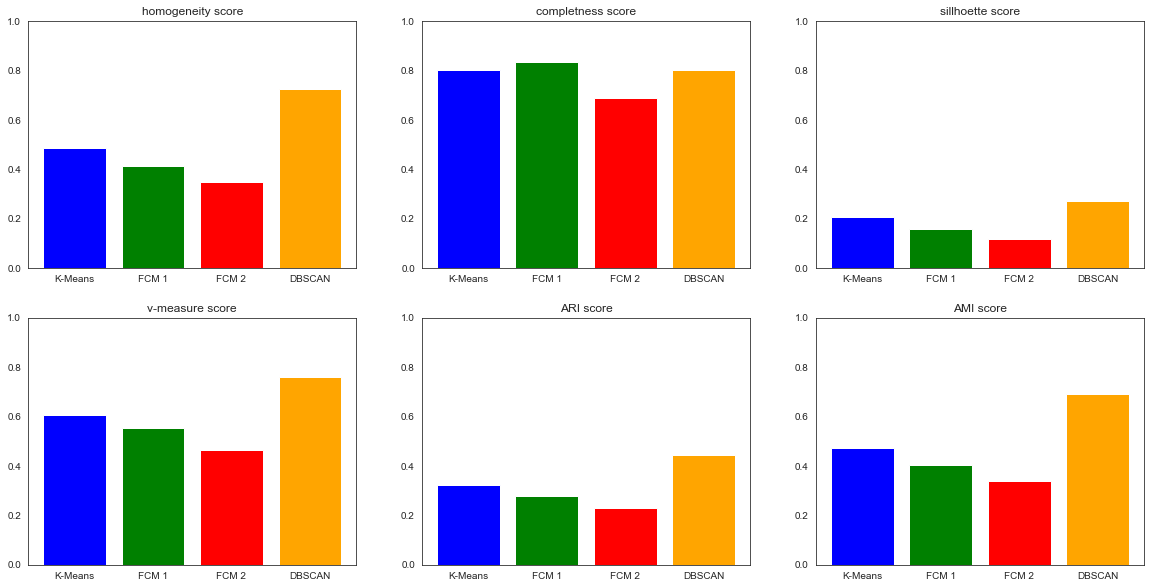

In [13]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2, 3, 1)
ax1.set_title("homogeneity score")
plt.bar(range(len(hms)), list(hms.values()), tick_label=list(hms.keys()), color=['blue', 'green', 'red', 'orange'])
ax1.set_ylim([0, 1])

ax2 = plt.subplot(2, 3, 2)
ax2.set_title("completness score")
plt.bar(range(len(cms)), list(cms.values()), tick_label=list(cms.keys()), color=['blue', 'green', 'red', 'orange'])
ax2.set_ylim([0, 1])

ax3 = plt.subplot(2, 3, 3)
ax3.set_title("sillhoette score")
plt.bar(range(len(sls)), list(sls.values()), tick_label=list(sls.keys()), color=['blue', 'green', 'red', 'orange'])
ax3.set_ylim([0, 1])

ax4 = plt.subplot(2, 3, 4)
ax4.set_title("v-measure score")
plt.bar(range(len(vms)), list(vms.values()), tick_label=list(vms.keys()), color=['blue', 'green', 'red', 'orange'])
ax4.set_ylim([0, 1])

ax5 = plt.subplot(2, 3, 5)
ax5.set_title("ARI score")
plt.bar(range(len(aris)), list(aris.values()), tick_label=list(aris.keys()), color=['blue', 'green', 'red', 'orange'])
ax5.set_ylim([0, 1])

ax6 = plt.subplot(2, 3, 6)
ax6.set_title("AMI score")
plt.bar(range(len(amis)), list(amis.values()), tick_label=list(amis.keys()), color=['blue', 'green', 'red', 'orange'])
ax6.set_ylim([0, 1])

### Сравнение визуализации результатов кластеризации (t-SNE)

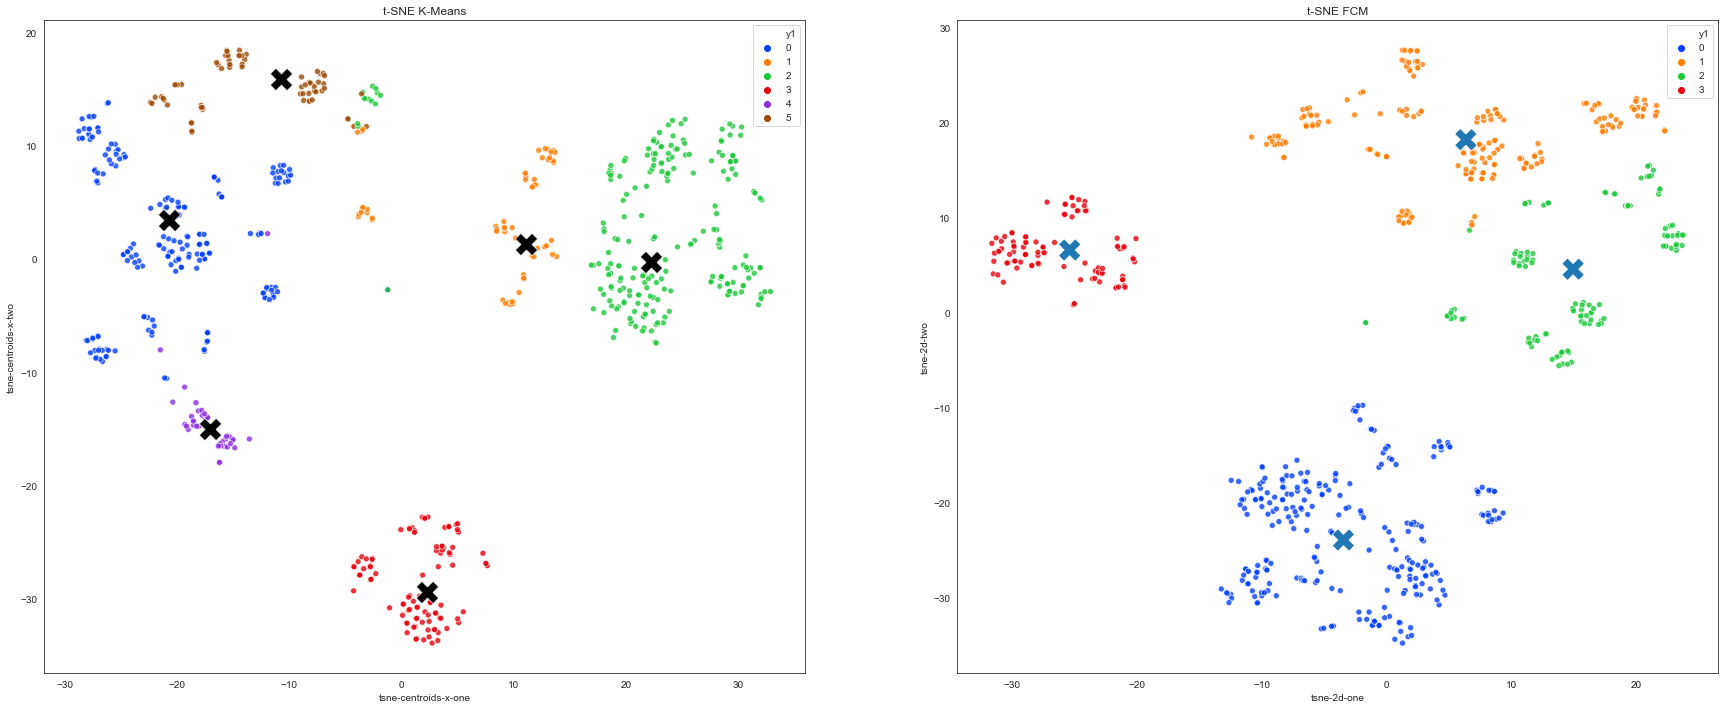

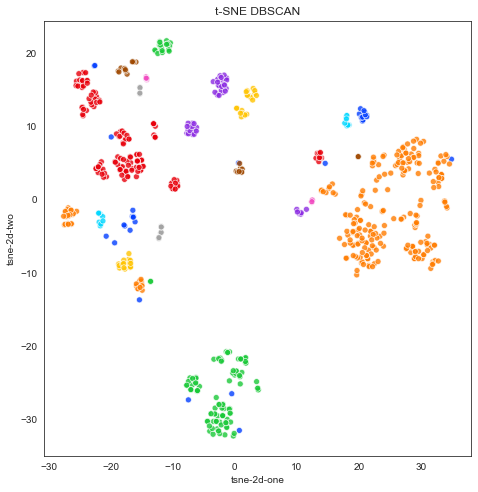

In [254]:
fig = plt.figure(figsize=(30, 12))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("t-SNE K-Means")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 6), 
                data=x1_df, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df, legend=False, 
                alpha=1, marker='X', s=500, color='black')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("t-SNE FCM")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 4), 
                data=x_df_1, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers, legend=False, 
                alpha=1, marker='X', s=500, color='black')

fig1 = plt.figure(figsize=(26, 8))
ax3 = plt.subplot(1, 3, 3)
ax3.set_title("t-SNE DBSCAN")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 26), 
                data=x2_df, legend=False, alpha=0.8)

### Сравнение визуализации результатов кластеризации (UMAP)

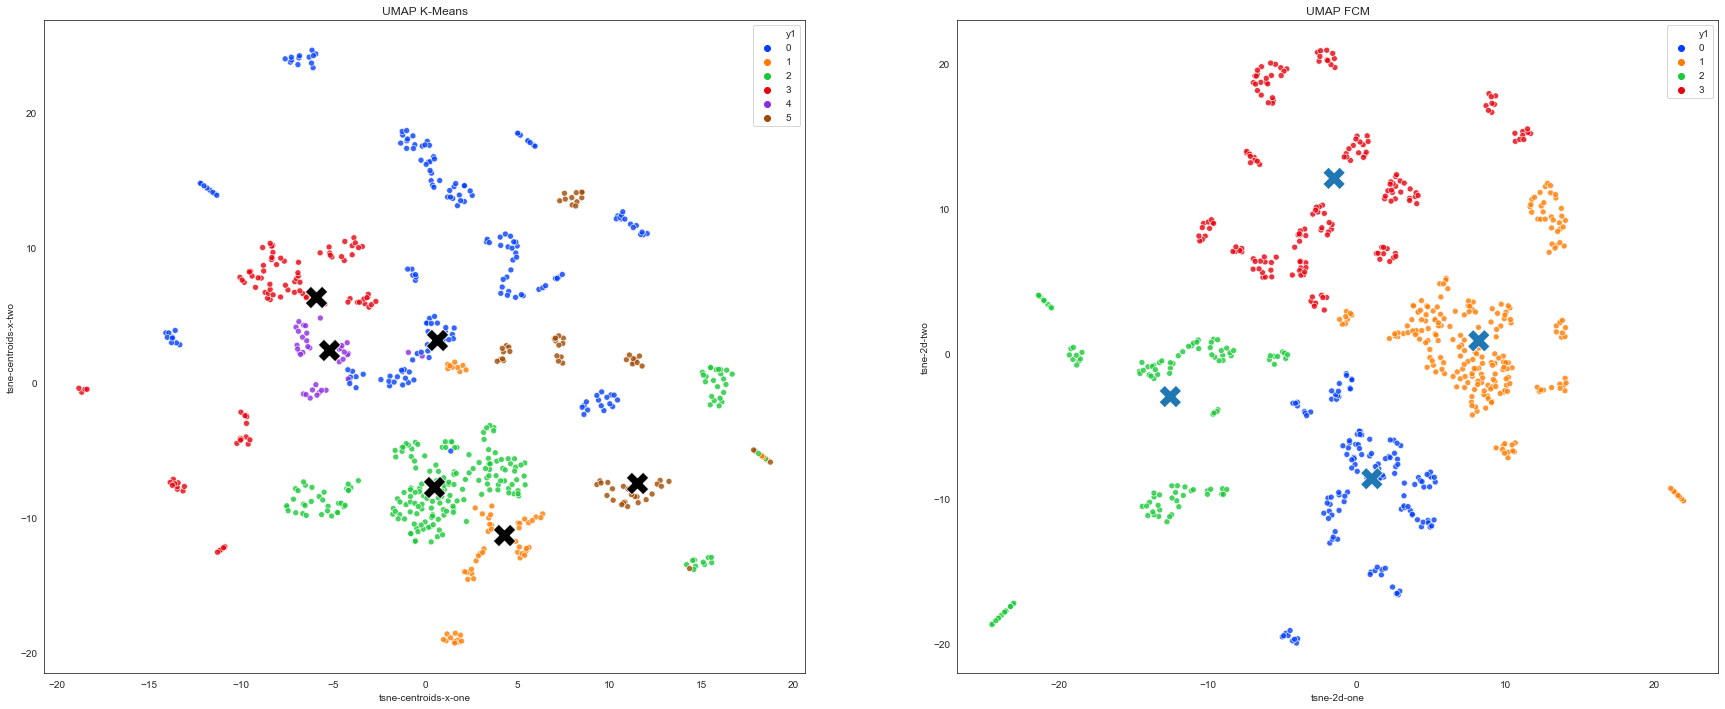

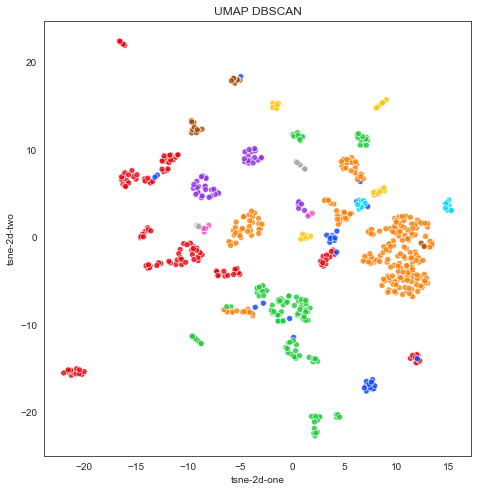

In [257]:
fig = plt.figure(figsize=(30, 12))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("UMAP K-Means")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 6), 
                data=x1_df_k, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-centroids-x-one", y="tsne-centroids-x-two", 
                hue="tsne-centroids-y", data=c_df_k, legend=False, 
                alpha=1, marker='X', s=500, color='black')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("UMAP FCM")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 4), 
                data=x_df_2, legend="full", alpha=0.8)

sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", 
                hue="yc", data=centers_1, legend=False, 
                alpha=1, marker='X', s=500, color='black')

fig1 = plt.figure(figsize=(26, 8))
ax3 = plt.subplot(1, 3, 3)
ax3.set_title("UMAP DBSCAN")
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y1", 
                palette=sns.color_palette("bright", 26), 
                data=x2_df_1, legend=False, alpha=0.8)

## Выводы
Сравнив полученные результаты, можно сделать вывод, что лучшим методом кластеризации для набора данных Soybean является алгоритм DBSCAN. Данный метод, оперируя информацией о плотности данных, разбил объекты на классы даже более подробно, чем было указано в самой выборке (26 классов в DBSCAN - 19 классов в выборке).  
Второе место делят алгоритм K-Means и FCM (с преобразованием исходных данных с помощью t-SNE). Их результаты получились очень схожими. Хуже же всего показал себя метод FCM, оперирующий исходными данными, преобразованными с помощью алгоритма понижения размерности UMAP.